<a href="https://colab.research.google.com/github/harene006/Digital_portfolio/blob/main/Harene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2-2299370864.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-2-2299370864.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'


Gender-wise survival count:
          Died  Survived
sex                    
female    NaN     152.0
male    266.0       NaN

Gender-wise survival rate:
       sex  survived
0  female       1.0
1    male       0.0


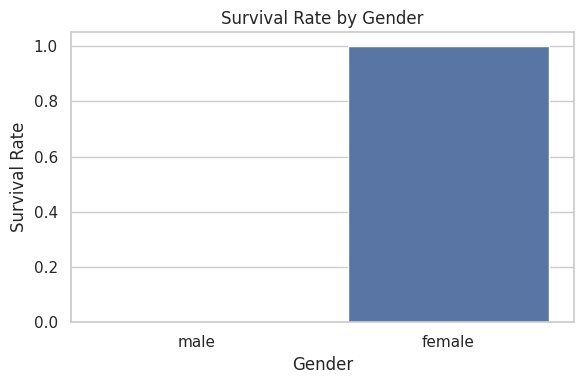

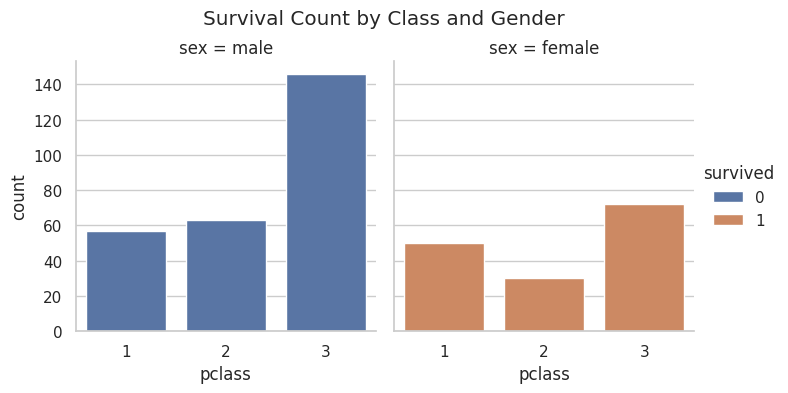

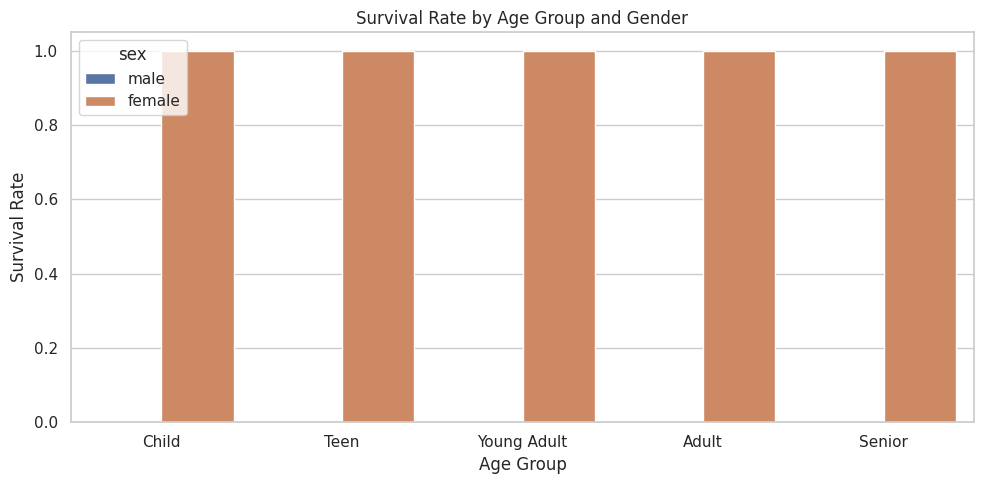

In [2]:
# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style='whitegrid')

# Step 2: Load Dataset from Local CSV File
df = pd.read_csv("/content/tested.csv")

# Optional: Normalize column names if needed
df.columns = df.columns.str.strip().str.lower()

# Step 3: Clean Data
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop deck column if it exists (some CSVs may not have it)
if 'deck' in df.columns:
    df.drop(columns=['deck'], inplace=True)

# Create Age Groups
df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 100],
                         labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Step 4: Gender-wise Survival Count
gender_survival = df.groupby('sex')['survived'].value_counts().unstack()
gender_survival.columns = ['Died', 'Survived']
print("\nGender-wise survival count:\n", gender_survival)

# Step 5: Gender-wise Survival Rate
gender_survival_rate = df.groupby('sex')['survived'].mean().reset_index()
print("\nGender-wise survival rate:\n", gender_survival_rate)

# Step 6: Plot Gender-wise Survival Rate
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

# Step 7: Survival by Gender & Class
sns.catplot(x='pclass', hue='survived', col='sex',
            data=df, kind='count', height=4, aspect=0.9)
plt.subplots_adjust(top=0.85)
plt.suptitle('Survival Count by Class and Gender')
plt.show()

# Step 8: Survival Rate by Gender & Age Group
plt.figure(figsize=(10, 5))
sns.barplot(x='age_group', y='survived', hue='sex', data=df)
plt.title('Survival Rate by Age Group and Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()